In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
filename = 'https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Employee+Churn+in+Python/HR_comma_sep.csv'
data = pd.read_csv(filename)

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.rename(columns={'satisfaction_level': 'nivel_de_satisfação', 'last_evaluation': 'ultima_avaliação', 
                     'number_project': 'número_de_projetos', 'average_montly_hours': 'media_horas_mes', 
                     'time_spend_company': 'tempo_na_empresa', 'Work_accident': 'acidente_trabalho', 
                     'left': 'saiu_da_empresa', 'promotion_last_5years': 'promoção_nos_ultimos_5anos'
                     , 'Departments ': 'departamentos', 'salary': 'salario'}, inplace=True)

In [6]:
data.head()

,nivel_de_satisfação,ultima_avaliação,número_de_projetos,media_horas_mes,tempo_na_empresa,acidente_trabalho,saiu_da_empresa,promoção_nos_ultimos_5anos,departamentos,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.describe()

,nivel_de_satisfação,ultima_avaliação,número_de_projetos,media_horas_mes,tempo_na_empresa,acidente_trabalho,saiu_da_empresa,promoção_nos_ultimos_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nivel_de_satisfação         14999 non-null  float64
 1   ultima_avaliação            14999 non-null  float64
 2   número_de_projetos          14999 non-null  int64  
 3   media_horas_mes             14999 non-null  int64  
 4   tempo_na_empresa            14999 non-null  int64  
 5   acidente_trabalho           14999 non-null  int64  
 6   saiu_da_empresa             14999 non-null  int64  
 7   promoção_nos_ultimos_5anos  14999 non-null  int64  
 8   departamentos               14999 non-null  object 
 9   salario                     14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

nivel_de_satisfação           0
ultima_avaliação              0
número_de_projetos            0
media_horas_mes               0
tempo_na_empresa              0
acidente_trabalho             0
saiu_da_empresa               0
promoção_nos_ultimos_5anos    0
departamentos                 0
salario                       0
dtype: int64

In [10]:
data.groupby('saiu_da_empresa').agg(np.mean)

,nivel_de_satisfação,ultima_avaliação,número_de_projetos,media_horas_mes,tempo_na_empresa,acidente_trabalho,promoção_nos_ultimos_5anos
saiu_da_empresa,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0, 0.5, 'Número de funcionários')

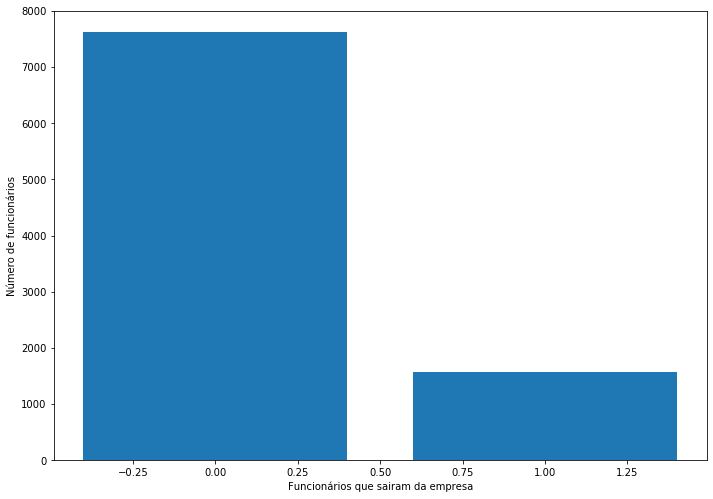

In [11]:
plt.bar(data.groupby('saiu_da_empresa').agg(np.sum).index, data.groupby('saiu_da_empresa').agg(np.sum)['nivel_de_satisfação'])
plt.xlabel('Funcionários que sairam da empresa')
plt.ylabel('Número de funcionários')

Text(0, 0.5, 'Média de horas trabalhadas por mês')

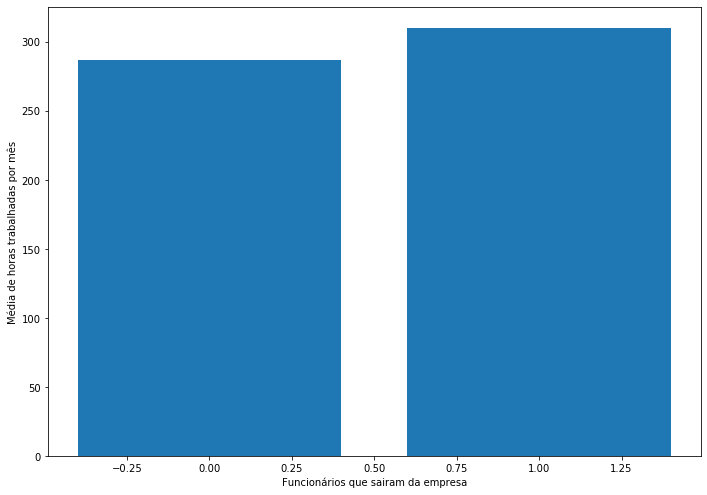

In [12]:
plt.bar(data.saiu_da_empresa, data.media_horas_mes)
plt.xlabel('Funcionários que sairam da empresa')
plt.ylabel('Média de horas trabalhadas por mês')

###### análise da média de horas trabalhadas por mês, por funcionários que sairam ou permaneceram na empresa pelo deparmento que eles atuam ou atuaram 

In [13]:
dict_dep = {'IT': 'IT', 'RandD': 'RD', 'accounting': 'acc', 'management': 'mng', 'marketing': 'mk', 'product_mng': 'pd_mng', 'support': 'spp', 
            'technical': 'tc', 'hr': 'hr', 'sales': 'sales'}
data_dp_se_mhm = data
data_dp_se_mhm['departamentos'] = data_dp_se_mhm['departamentos'].map(dict_dep)

In [14]:
data_dp_se_mhm = data_dp_se_mhm.groupby(['departamentos', 'saiu_da_empresa']).agg({'media_horas_mes': np.mean})
data_dp_se_mhm

media_horas_mes
departamentos saiu_da_empresa                 
IT            0                     198.886792
              1                     213.849817
RD            0                     198.951952
              1                     210.975207
acc           0                     199.037300
              1                     207.029412
hr            0                     199.250000
              1                     197.306977
mk            0                     198.888550
              1                     200.990148
mng           0                     200.233766
              1                     207.263736
pd_mng        0                     197.765625
              1                     207.787879
sales         0                     199.571657
              1                     205.041420
spp           0                     199.140980
              1                     205.636036
tc            0                     198.471083
              1                     214.183644

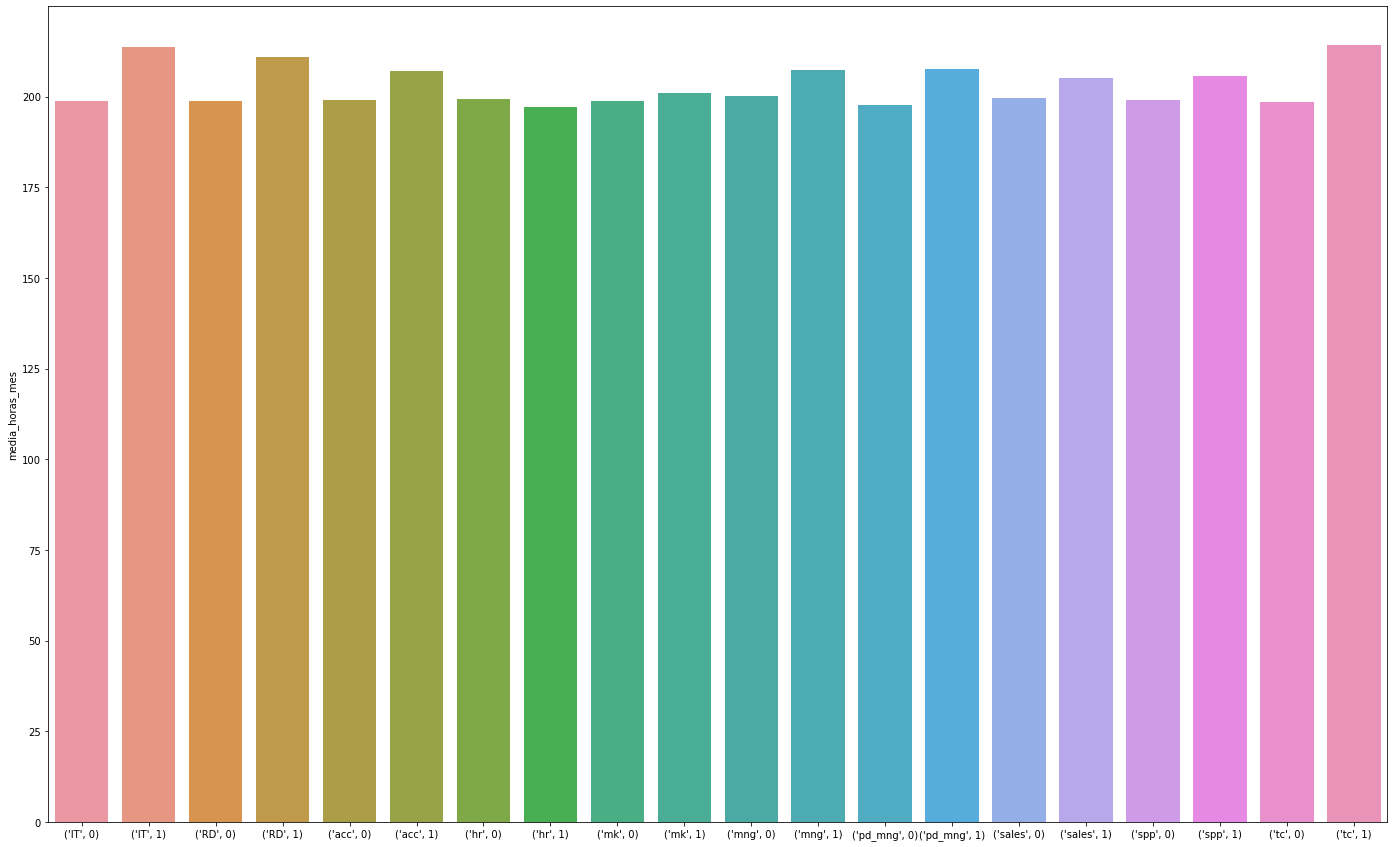

In [15]:
plt.figure(figsize=(24, 15))
sns.barplot(x=data_dp_se_mhm.index, y="media_horas_mes", data=data_dp_se_mhm)

In [16]:
data.groupby('número_de_projetos').count()

,nivel_de_satisfação,ultima_avaliação,media_horas_mes,tempo_na_empresa,acidente_trabalho,saiu_da_empresa,promoção_nos_ultimos_5anos,departamentos,salario
número_de_projetos,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


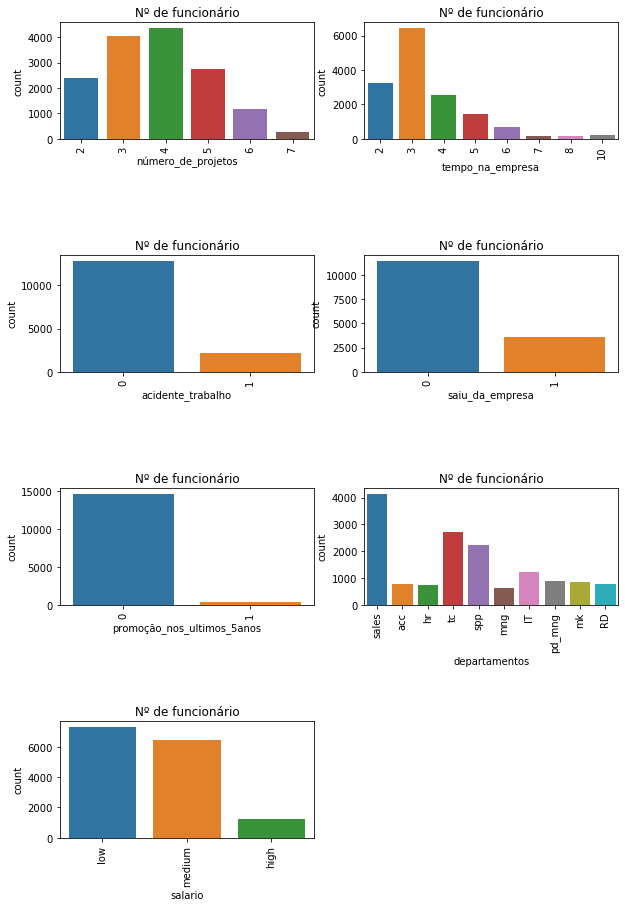

In [19]:
features=['número_de_projetos','tempo_na_empresa','acidente_trabalho','saiu_da_empresa', 'promoção_nos_ultimos_5anos','departamentos','salario']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("Nº de funcionário")

No handles with labels found to put in legend.


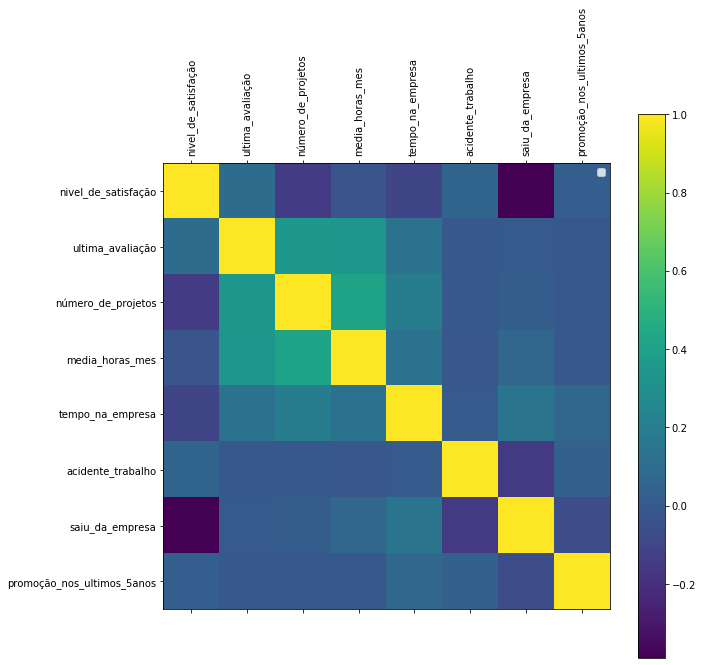

In [20]:
def plot_corr(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(data)

In [21]:
categorial = ['departamentos','salario']
data = pd.get_dummies(data, columns=categorial, drop_first=True)
data.head()

,nivel_de_satisfação,ultima_avaliação,número_de_projetos,media_horas_mes,tempo_na_empresa,acidente_trabalho,saiu_da_empresa,promoção_nos_ultimos_5anos,departamentos_RD,departamentos_acc,departamentos_hr,departamentos_mk,departamentos_mng,departamentos_pd_mng,departamentos_sales,departamentos_spp,departamentos_tc,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(['saiu_da_empresa'],axis=1).values

y = data['saiu_da_empresa'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

acc = 100*accuracy_score(predictions, y_test)
print("Accuracy {0:.2f}%".format(acc))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.93%
[[3387   10]
 [  38 1065]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3397
           1       0.99      0.97      0.98      1103

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [26]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[3387   10]
 [  38 1065]]
Normalized confusion matrix
[[0.99705623 0.00294377]
 [0.0344515  0.9655485 ]]


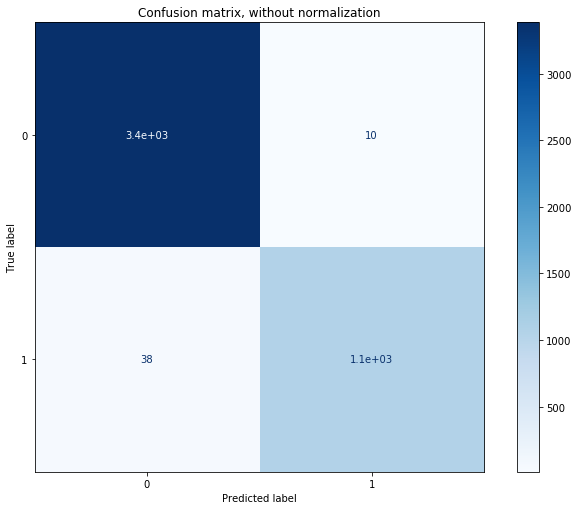

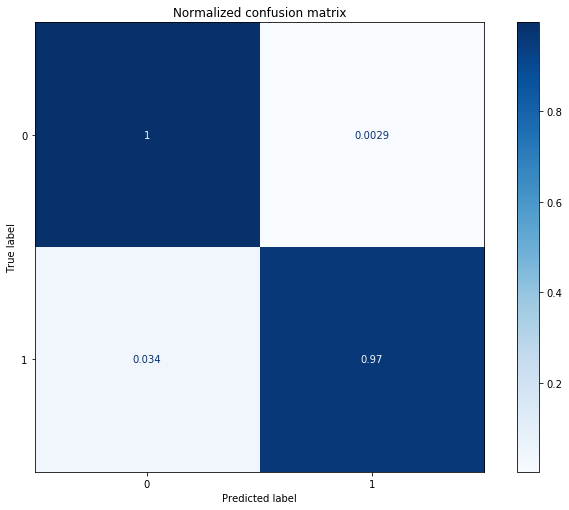

In [27]:
class_names = [0 , 1]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
from sklearn.metrics import roc_curve  
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC ' + str(acc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

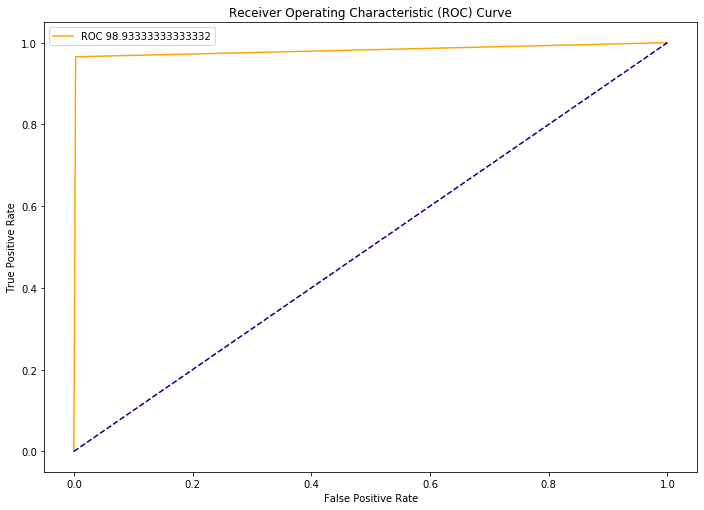

In [29]:
fper, tper, thresholds = roc_curve(y_test, predictions)
plot_roc_cur(fper, tper)